Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement en_core_web_sm (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for en_core_web_sm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


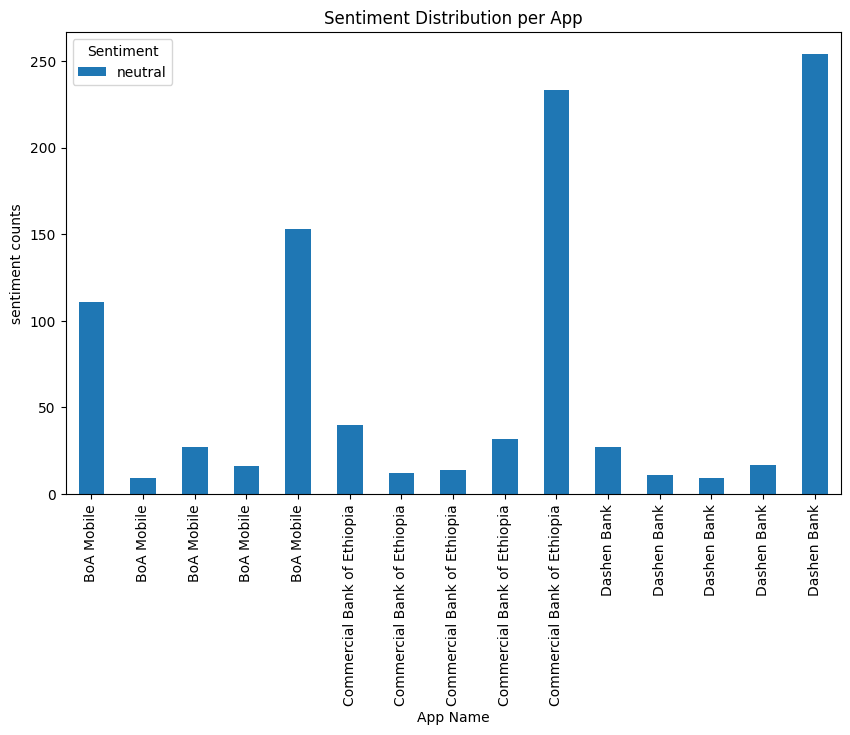

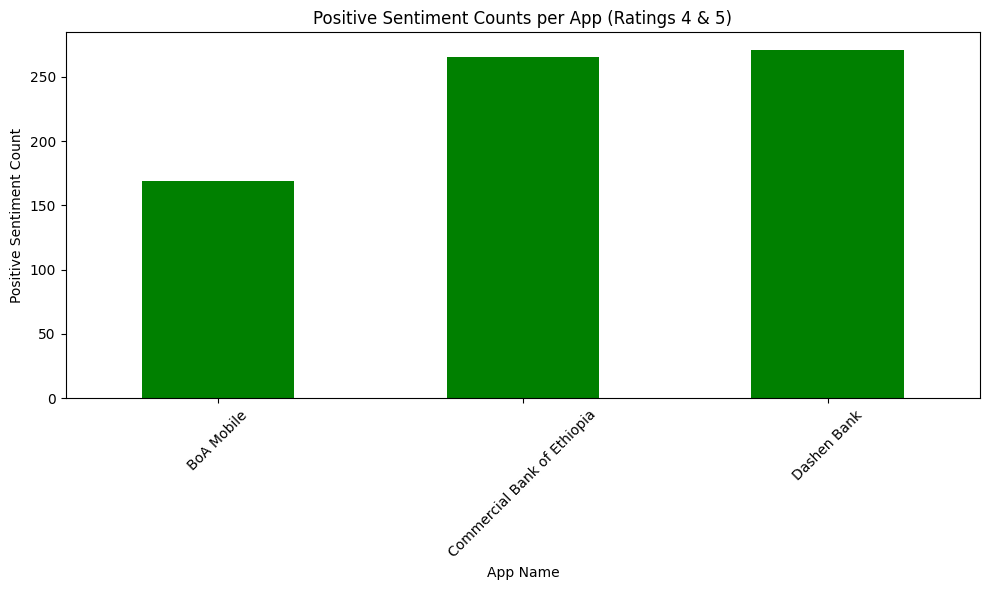

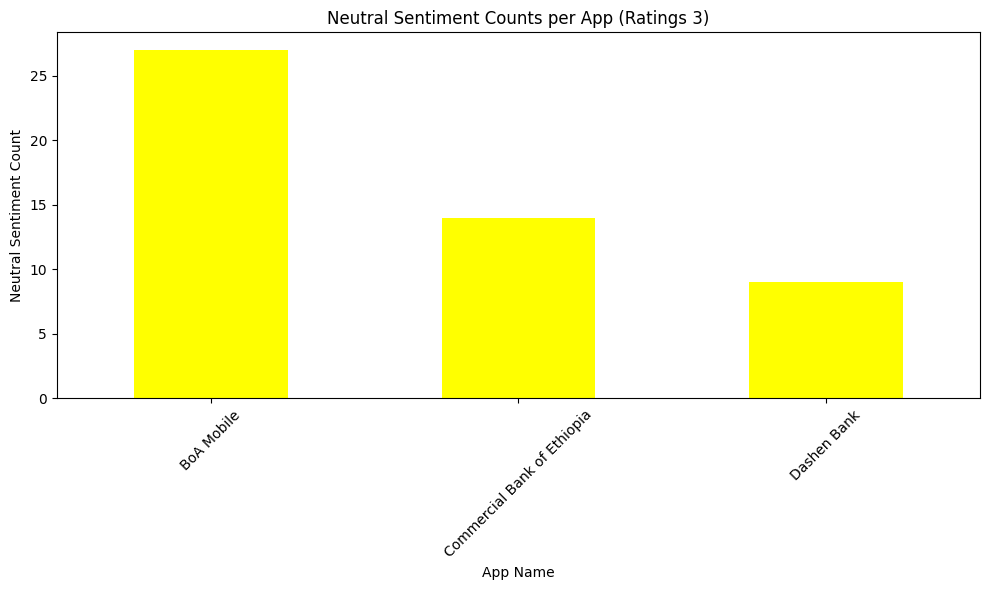

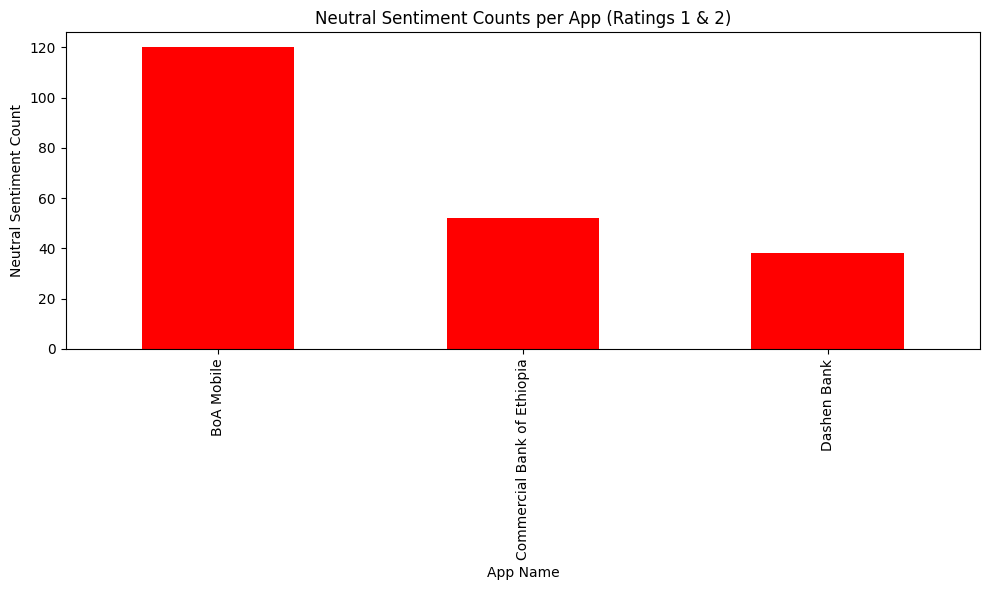

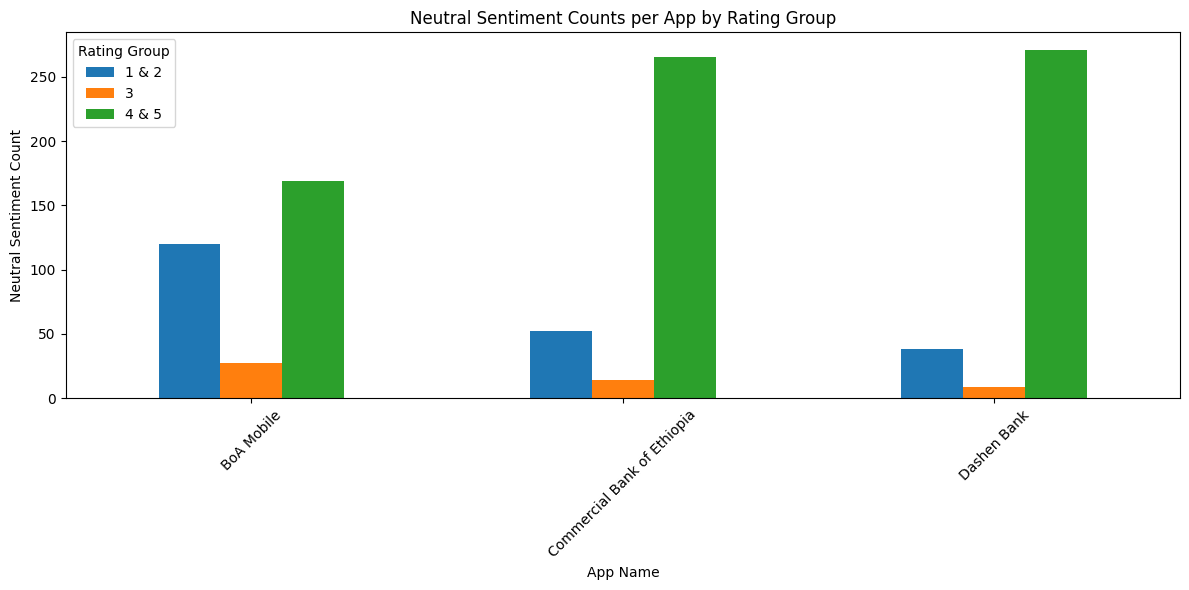

In [ ]:
%pip install transformers
%pip install textblob
%pip install torch
%pip install scikit-learn
%pip install nltk
%pip install pandas
%pip install spacy
%pip install en_core_web_sm
%pip install kagglehub
%pip install wordcloud
%pip install matplotlib

# Download the spaCy English model
import pandas as pd
import sys
sys.path.append('../scripts')  # Add the scripts folder to the path
import sentiment_analysis
# Load the DataFrame from CSV
#df = pd.read_csv('Ethiopian_banks_review_cleaned.csv')
#sentiment_analysis.add_sentiment_column(df, sentiment_col='sentiment', text_col='review_text', output_file='Ethiopian_banks_review_cleaned_with_sentiment.csv')
#sentiment_analysis.analyze_reviews('Ethiopian_banks_review_cleaned.csv', 'sentiment_analysis.csv', 'textblob')
# Ensure thematic_analysis.py exists in ../scripts
#sentiment_analysis.get_top_keywords('Ethiopian_banks_review_cleaned.csv', 'thematic_analysis.csv')
#get_top_keywords = sentiment_analysis.get_top_keywords
#extract_key_words_by_sentiment = sentiment_analysis.extract_key_words_by_sentiment
import matplotlib.pyplot as plt
#df = pd.read_csv('Ethiopian_banks_review_cleaned_with_sentiment.csv')
#sentiment_analysis.plot_negative_wordcloud(df, sentiment_col='sentiment', text_col='review_text')
#sentiment_analysis.plot_positive_wordcloud(df, sentiment_col='sentiment', text_col='review_text')
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
df = pd.read_csv('sentiment_analysis_aggregated.csv')

# Split the sentiment_distribution column into separate columns
def parse_distribution(dist):
    # If dist is a string, try to eval it to a dict
    if isinstance(dist, str):
        import ast
        dist = ast.literal_eval(dist)
    # Normalize keys to uppercase
    dist = {k.upper(): v for k, v in dist.items()}
    return pd.Series({
               'neutral': dist.get('NEUTRAL', 0),
            })

sentiment_counts = df['sentiment_distribution'].apply(parse_distribution)
df = pd.concat([df, sentiment_counts], axis=1)

# Now plot the result
df.set_index('app_name')[['neutral']].plot(kind='bar', figsize=(10,6))
plt.title('Sentiment Distribution per App')
plt.xlabel('App Name')
plt.ylabel('sentiment counts')
plt.legend(title='Sentiment')
plt.show()
# Filter for ratings 4 and 5
df_filtered = df[df['rating'].isin([4, 5])]

# Group by app_name and sum positive counts
grouped = df_filtered.groupby('app_name')['neutral'].sum()

# Plot only positive sentiment counts
grouped.plot(kind='bar', color='green', figsize=(10,6))
plt.title('Positive Sentiment Counts per App (Ratings 4 & 5)')
plt.xlabel('App Name')
plt.ylabel('Positive Sentiment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Filter for ratings 3
df_filtered = df[df['rating'].isin([3])]

# Group by app_name and sum neutral counts
grouped = df_filtered.groupby('app_name')['neutral'].sum()

# Plot only neutral sentiment counts
grouped.plot(kind='bar', color='yellow', figsize=(10,6))
plt.title('Neutral Sentiment Counts per App (Ratings 3)')
plt.xlabel('App Name')
plt.ylabel('Neutral Sentiment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Filter for ratings 2 and 1
df_filtered = df[df['rating'].isin([1, 2])]

# Group by app_name and sum positive counts
grouped = df_filtered.groupby('app_name')['neutral'].sum()

# Plot only positive sentiment counts
grouped.plot(kind='bar', color='red', figsize=(10,6))
plt.title('Neutral Sentiment Counts per App (Ratings 1 & 2)')
plt.xlabel('App Name')
plt.ylabel('Neutral Sentiment Count')
plt.tight_layout()
plt.show()
# Create rating groups
def rating_group(r):
    if r in [4, 5]:
        return 'positive'
    elif r == 3:
        return 'neutral'
    else:
        return 'negative'

df['rating_group'] = df['rating'].apply(rating_group)

# Group by app_name and rating_group, sum neutral counts
grouped = df.groupby(['app_name', 'rating_group'])['neutral'].sum().unstack(fill_value=0)

# Plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Neutral Sentiment Counts per App by Rating Group')
plt.xlabel('App Name')
plt.ylabel('Neutral Sentiment Count')
plt.legend(title='Rating Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()